Step 1: Original Image


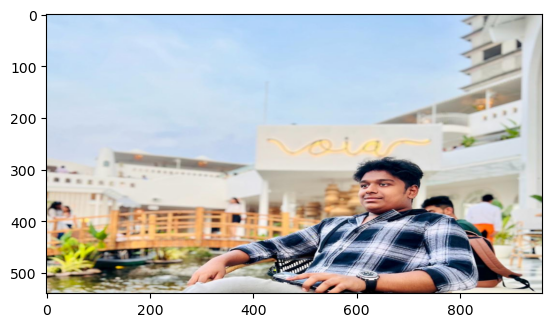

Step 2: Grayscale Image


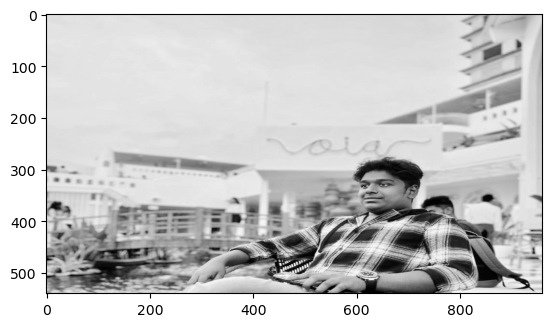

Step 3: Smoothed Grayscale Image


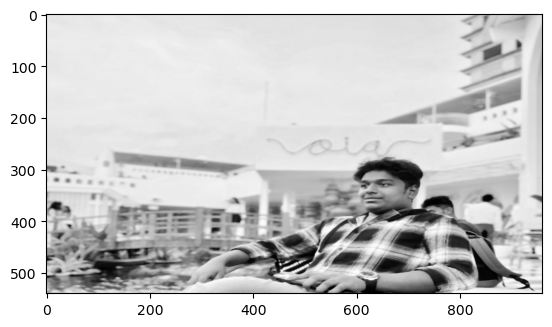

Step 4: Edges Image


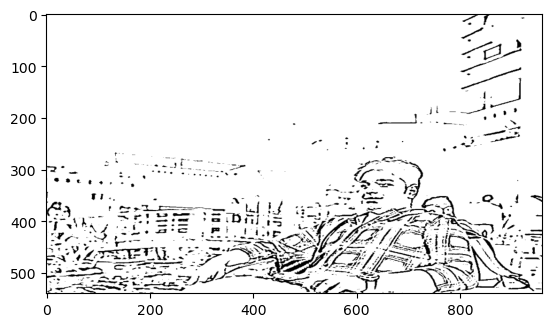

Step 5: Color Image


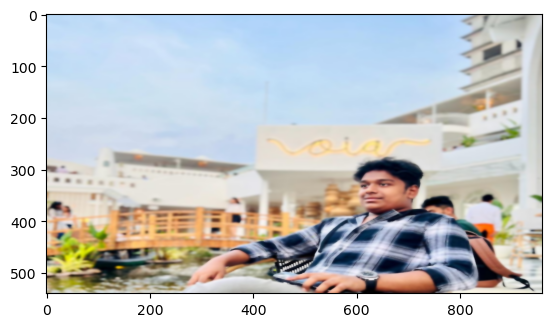

Step 6: Cartoonified Image


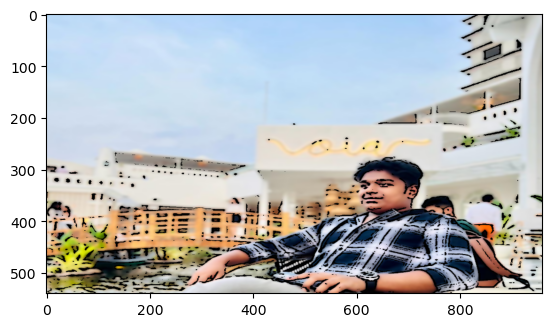

In [ ]:
import cv2
import easygui
import numpy as np
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

def upload():
    ImagePath = easygui.fileopenbox()
    cartoonify(ImagePath)

def cartoonify(ImagePath):
    originalImage = cv2.imread(ImagePath)
    originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
    
    if originalImage is None:
        print("Cannot find any image. Choose an appropriate file.")
        sys.exit()

    ReSized1 = cv2.resize(originalImage, (960, 540))
    print("Step 1: Original Image")
    plt.imshow(ReSized1)
    plt.show()

    grayScaleImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    print("Step 2: Grayscale Image")
    plt.imshow(ReSized2, cmap='gray')
    plt.show()

    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    print("Step 3: Smoothed Grayscale Image")
    plt.imshow(ReSized3, cmap='gray')
    plt.show()

    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    ReSized4 = cv2.resize(getEdge, (960, 540))
    print("Step 4: Edges Image")
    plt.imshow(ReSized4, cmap='gray')
    plt.show()

    colorImage = cv2.bilateralFilter(originalImage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    print("Step 5: Color Image")
    plt.imshow(ReSized5)
    plt.show()

    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    print("Step 6: Cartoonified Image")
    plt.imshow(ReSized6)
    plt.show()

    save1 = Button(top, text="Save cartoon image", command=lambda: save(ReSized6, ImagePath), padx=30, pady=5)
    save1.configure(background='#364156', foreground='white', font=('calibri', 10, 'bold'))
    save1.pack(side=TOP, pady=50)

    return ReSized6

def save(ReSized6, ImagePath):
    newName = "cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension = os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName + extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I = "Image saved by name " + newName + " at " + path
    tk.messagebox.showinfo(title=None, message=I)

top = tk.Tk()
top.geometry('200x300')
top.title('Cartoonify Your Image !')
top.configure(background='white')

label = Label(top, background='#CDCDCD', font=('calibri', 20, 'bold'))

upload = Button(top, text="Cartoonify an Image", command=upload, padx=10, pady=5)
upload.configure(background='#364156', foreground='white', font=('calibri', 10, 'bold'))
upload.pack(side=TOP, pady=50)

top.mainloop()
